# Complexité algorithmique

**Définition simple :** La complexité algorithmique mesure les ressources (principalement le temps de calcul et la mémoire) nécessaires à un algorithme pour résoudre un problème en fonction de la taille de ses données d'entrée.

---
## Pourquoi est-ce important ?

Ce n'est pas une mesure du temps d'exécution réel en secondes (qui dépend de l'ordinateur, du langage, etc.), mais une **estimation de la croissance** du temps d'exécution. Un algorithme peut être très rapide sur un petit volume de données, mais devenir extrêmement lent, voire inutilisable, sur un grand volume.

Comprendre la complexité permet de choisir l'algorithme le plus efficace et d'anticiper comment un programme se comportera face à des données plus volumineuses. Au lieu de mesurer le temps, on compte le **nombre d'opérations élémentaires** (affectations, comparaisons, opérations arithmétiques) qu'un algorithme effectue.

---
## La notation grand O (big O)

La notation Big O est l'outil mathématique utilisé pour décrire cette complexité. Elle décrit le **pire des cas** (la limite supérieure) du nombre d'opérations en fonction de la taille de l'entrée, notée `n`.

**Règles de simplification :**
1.  **On garde le terme dominant :** Dans une expression comme `n² + n`, le terme `n²` croît beaucoup plus vite que `n`. Pour de grandes valeurs de `n`, la contribution de `n` devient négligeable. On simplifie donc en O(n²).
2.  **On ignore les constantes :** Que l'on fasse `2n` ou `n` opérations, le taux de croissance est linéaire. On s'intéresse à l'ordre de grandeur, pas au facteur exact. On simplifie donc O(2n) en O(n).

**Exemples :**
- `4n³ + 2n² + 20`  →  `O(n³)`
- `100log(n) + 3n`  →  `O(n)`

### Ordres de grandeur courants

Voici quelques complexités courantes, de la plus efficace à la moins efficace :
- **O(1) - Constant :** Le temps d'exécution est indépendant de la taille des données (ex: accéder à un élément d'un tableau par son index).
- **O(log n) - Logarithmique :** Le temps augmente très lentement (ex: recherche dichotomique).
- **O(n) - Linéaire :** Le temps est directement proportionnel à la taille des données (ex: parcourir tous les éléments d'une liste).
- **O(n log n) - Quasi-linéaire :** Très efficace pour les algorithmes de tri (ex: tri fusion).
- **O(n²) - Quadratique :** Le temps augmente selon le carré de la taille (ex: boucles imbriquées, tri à bulles).
- **O(2ⁿ) - Exponentiel :** Devient rapidement inutilisable même pour de petites valeurs de `n`.
- **O(n!) - Factoriel :** Encore pire, souvent lié à des problèmes de permutation.

![Illustration des ordres de grandeur](../ressources/complexite_graphique.png)

---
## Exemple concret 1 : trouver le maximum dans une liste

Pour comprendre l'impact concret de la complexité, comparons deux méthodes pour trouver la valeur maximale dans une liste. L'une est efficace (linéaire), l'autre est volontairement inefficace (quadratique).

L'algorithme pour trouver le maximum est un concept de base en programmation, implémenté de manière similaire dans de nombreux langages.

![Implémentations de l'algorithme](../ressources/liste_code.png)

Les mesures de temps d'exécution réelles confirment la théorie. Le graphique ci-dessous, tiré d'une exécution, montre la croissance linéaire du temps pour un algorithme efficace entre C++ et Python.

![Graphiques de performance réels](../ressources/vitesse_code.png)

In [1]:
from time import time
import random
from matplotlib import pyplot as plt

# Méthode 1 : Complexité Linéaire - O(n)
def trouver_maximum_efficace(tableau):
    """Parcourt la liste une seule fois."""
    maximum = tableau[0]
    # La boucle s'exécute 'n' fois, où n est la taille du tableau.
    for element in tableau:
        if element > maximum:
            maximum = element
    return maximum

# Méthode 2 : Complexité Quadratique - O(n²)
def trouver_maximum_inefficace(tableau):
    """Pour chaque élément, re-parcourt toute la liste."""
    for x in tableau: # Boucle externe (n fois)
        est_le_max = True
        for y in tableau: # Boucle interne (n fois)
            if y > x:
                est_le_max = False
        if est_le_max:
            return x


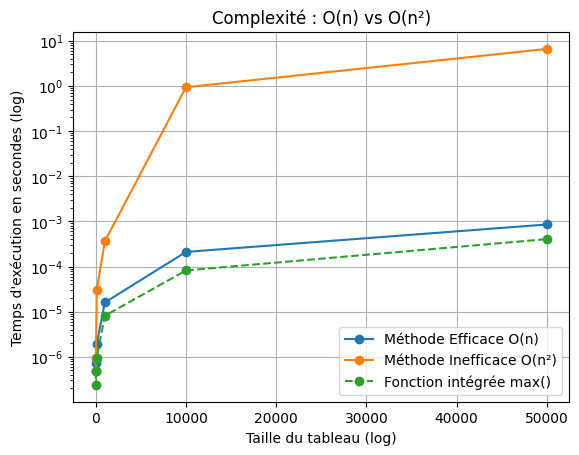

In [2]:
# --- Comparaison des performances --- 
tailles = [1, 10, 100, 1000, 10000, 50000]
temps_efficace = []
temps_inefficace = []
temps_integre = [] # La fonction intégrée max() de Python

for taille in tailles:
    tableau = [random.randint(-1000, 1000) for _ in range(taille)]

    # Mesure pour la méthode efficace
    start_time = time()
    trouver_maximum_efficace(tableau)
    temps_efficace.append(time() - start_time)

    # Mesure pour la méthode inefficace
    start_time = time()
    trouver_maximum_inefficace(tableau)
    temps_inefficace.append(time() - start_time)
    
    # Mesure pour la fonction intégrée
    start_time = time()
    max(tableau)
    temps_integre.append(time() - start_time)

# --- Affichage des résultats --- 
plt.plot(tailles, temps_efficace, label="Méthode Efficace O(n)", marker='o')
plt.plot(tailles, temps_inefficace, label="Méthode Inefficace O(n²)", marker='o')
plt.plot(tailles, temps_integre, label="Fonction intégrée max()", marker='o', linestyle='--')

# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Taille du tableau (log)')
plt.ylabel('Temps d\'exécution en secondes (log)')
plt.title('Complexité : O(n) vs O(n²)')
plt.legend()
plt.grid(True)
plt.show()

**Analyse du graphique :**

Le graphique (en échelle logarithmique pour être lisible) montre clairement que le temps d'exécution de la méthode inefficace O(n²) **explose** lorsque la taille du tableau augmente, tandis que celui de la méthode efficace O(n) (et de la fonction `max()` intégrée) augmente de manière beaucoup plus contrôlée et prévisible. 

Une telle inefficacité rend un algorithme **inutilisable en pratique**. Dans un contexte professionnel ou universitaire, un algorithme quadratique pour ce problème serait jugé inacceptable.

---
## Exemple Concret 2 : Vérifier si un Nombre est Premier

Un autre exemple classique est la vérification de primalité d'un nombre. Une approche naïve (tester tous les diviseurs jusqu'à `n`) est très lente. On peut l'améliorer significativement avec une meilleure compréhension mathématique.

In [3]:
from time import time
import math

# Méthode 1 : Naïve - O(n)
def est_premier_naif(n):
    if n < 2:
        return False
    # On teste tous les diviseurs de 2 jusqu'à n-1
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

# Méthode 2 : Optimisée - O(sqrt(n))
def est_premier_optimise(n):
    if n < 2:
        return False
    if n == 2 or n == 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    # On ne teste que jusqu'à la racine carrée de n
    # Et on saute les nombres pairs
    for i in range(5, int(math.sqrt(n)) + 1, 6):
        if n % i == 0 or n % (i + 2) == 0:
            return False
    return True


In [4]:
# --- Comparaison des performances --- 
nombre_a_tester = 1000081 # Un grand nombre premier

print(f"Test de primalité pour {nombre_a_tester}")

start_time = time()
resultat = est_premier_optimise(nombre_a_tester)
duree = (time() - start_time) * 1000 # en ms
print(f"Méthode Optimisée O(sqrt(n)) : {resultat} (calculé en {duree:.4f} ms)")

start_time = time()
resultat = est_premier_naif(nombre_a_tester)
duree = (time() - start_time) * 1000 # en ms
print(f"Méthode Naïve O(n) : {resultat} (calculé en {duree:.4f} ms)")

Test de primalité pour 1000081
Méthode Optimisée O(sqrt(n)) : True (calculé en 0.0472 ms)
Méthode Naïve O(n) : True (calculé en 22.4700 ms)


**Analyse des résultats :**

La différence de temps est spectaculaire. L'algorithme optimisé, qui a une complexité bien moindre (racine carrée de n), donne une réponse quasi-instantanée, tandis que l'algorithme naïf prend un temps considérable. Cela montre que le choix du bon algorithme est souvent plus important que la vitesse brute de l'ordinateur.

---
# Résumé

- La complexité algorithmique est un outil essentiel pour **prédire la performance** d'un programme sur de grands volumes de données.
- La **notation Big O** permet de classifier les algorithmes selon leur taux de croissance.
- Un algorithme avec une complexité plus faible (ex: O(n)) sera presque toujours **préférable** à un algorithme avec une complexité plus élevée (ex: O(n²)) pour des problèmes de taille significative.
- Une bonne compréhension des structures de données et des algorithmes permet d'écrire du code non seulement correct, mais aussi **efficace**.


---

# Exercices pratiques

Il est toujours important d'avoir une bonne mémoire, car comme lorsqu'on apprend une langue il faut pouvoir rapidement se souvenir de plusieurs concepts, et il faut aussi bien lire les instructions car dans les fait nous convertissons des instructions sous forme de texte en Python. Il y a plusieurs façon d'atteindre une bonne réponse, l'important c'est que le code soit clair et qu'il fasse la bonne chose.

**Exercice 0 : Fibonacci - Simple vs Double Boucle (Démonstration)**

Comparez deux façons différentes de calculer le N-ième nombre de Fibonacci et analysez leur complexité.

1. Créez une fonction `fibonacci_simple(n)` :
   - Utilise une simple boucle
   - Deux variables pour stocker les deux derniers nombres
   - Complexité: O(n)

2. Créez une fonction `fibonacci_double(n)` :
   - Utilise une double boucle (comme dans un algorithme naïf)
   - Complexité: O(2n)

3. Testez les deux fonctions avec n = 5, 10, 15, 20.


In [5]:
import time

# Fonction 1: Fibonacci avec simple boucle - O(n)
def fibonacci_simple(n):
    if n <= 1:
        return n
    # TODO: Implémenter avec une simple boucle
    # Utilisez deux variables pour les deux derniers nombres
    pass

# Fonction 2: Fibonacci avec double boucle
def fibonacci_double(n):
    if n <= 1:
        return n


**Exercice 1 : Devinez la Complexité!**

Voici plusieurs fonctions courtes. **Sans les exécuter**, déterminez la complexité Big O de chaque fonction. Écrivez votre réponse en commentaire dans la cellule de code.

Les fonctions contiennent:
- Des boucles simples ou imbriquées
- Des opérations élémentaires (comparaisons, affectations)
- Parfois un `break` pour arrêter anticipativement

À vous de deviner: O(1), O(n), O(n²), O(n³), O(log n), ou autre?


In [6]:
def fonction_1(n):
    # Complexité: ?
    for i in range(n):
        print(i)

def fonction_2(n):
    # Complexité: ?
    for i in range(n):
        for j in range(n):
            print(i, j)

def fonction_3(n):
    # Complexité: ?
    for i in range(n):
        if i == 42:
            break
        print(i)

def fonction_4(n):
    # Complexité: ?
    x = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                x += 1
    return x

def fonction_5(n):
    # Complexité: ?
    while n > 1:
        n = n // 2
        print(n)

def fonction_6(n):
    # Complexité: ?
    result = []
    for i in range(n):
        for j in range(i):
            result.append((i, j))
        return result

# Testez et vérifiez vos réponses!
# Vous pouvez les exécuter et comparer vos prédictions.


<details>
 <summary>Voir réponse</summary>
<br />

## Réponses - Analyse de Complexité

**fonction_1(n):**
Complexité: O(n) - Linéaire
Explication: Une seule boucle qui s'exécute n fois. Chaque itération effectue une opération constante (print).

**fonction_2(n):**
Complexité: O(n²) - Quadratique
Explication: Deux boucles imbriquées. La boucle externe s'exécute n fois, et pour chaque itération, 
la boucle interne s'exécute aussi n fois. Total: n × n = n² opérations.

**fonction_3(n):**
Complexité: O(n) - Linéaire
Explication: Bien qu'il y ait un `break` qui arrête la boucle quand i == 42, 
on analyse toujours le **pire des cas**. Si n < 42, la boucle s'exécute n fois.
Si n ≥ 42, elle s'exécute 42 fois (constante). La complexité reste O(n) car elle dépend linéairement de n.

**fonction_4(n):**
Complexité: O(n³) - Cubique
Explication: Trois boucles imbriquées, toutes exécutées n fois. 
Total: n × n × n = n³ opérations.

**fonction_5(n):**
Complexité: O(log n) - Logarithmique
Explication: À chaque itération, n est divisé par 2. 
Pour réduire n à 1, il faut approximativement log₂(n) divisions.
Exemple: si n = 16, on obtient: 16 → 8 → 4 → 2 → 1 (4 itérations = log₂(16)).

**fonction_6(n):**
Complexité: O(1) - Constant (ou O(n) en pire cas selon l'interprétation)
Explication: Le `return` est à l'intérieur de la première boucle (dans la boucle externe), 
après la première itération de la boucle interne. La fonction retourne immédiatement 
après avoir ajouté un seul élément (la paire (1, 0)). Donc seulement 2 itérations 
se font au total → O(1) constant.

</details>


**Exercice 2 : Composition d'éléments**
Même si du code a parfois l'air complexe, il faut être capable de comprendre l'essence des opérations. Même si vous ne seriez pas capable de l'écrire, vous devriez être capable de fouiller dans vos notes, les jupyter-notebook passés ou sur le web et finalement executer les code pour le comprendre.

Voici un exemple de code potentiellement mélangeant !

In [7]:

n = 10
resultat = sum([i for i in range(n) for j in range(i)])

# Quelle est la complexité de ce code et pourquoi?


<details>
 <summary>Voir réponse</summary>
<br />

```python
# La list comprehension a deux boucles imbriquées:
# - La boucle externe parcourt range(n): 0, 1, 2, ..., n-1
# - Pour chaque i, la boucle interne parcourt range(i): 0 à i-1

# Nombre total d'itérations:
# i=0: 0 itérations de la boucle interne
# i=1: 1 itération
# i=2: 2 itérations
# ...
# i=n-1: n-1 itérations
# Total: 0 + 1 + 2 + ... + (n-1) = n(n-1)/2 = O(n²)

# Complexité: O(n²) (quadratique)
```

</details>

---

# Exercice 3 : Mini-devoir

**Exercice 3 : Trouver le Plus Petit Élément d'un Dictionnaire**

Une tâche simple pour mettre en pratique l'analyse de complexité.

1. Créez une fonction `find_min_value(dictionnaire)`:
   - Parcourt le dictionnaire
   - Trouve la plus petite valeur
   - Retourne à la fois la clé et la valeur
   - Exemple: `find_min_value({'Alice': 25, 'Bob': 20, 'Charlie': 23})` retourne `('Bob', 20)`

2. Déterminez la complexité Big O de votre fonction. Posez-vous ces questions:
   - Combien de fois parcours-je le dictionnaire?
   - Effectuez-je une ou plusieurs opérations pour chaque élément?
   - Le nombre d'opérations dépend-il de la taille du dictionnaire?

3. Écrivez une ligne de commentaire expliquant pourquoi c'est cette complexité.

4. Testez votre fonction avec plusieurs dictionnaires de différentes tailles.

**Indice:** Pensez à comment on parcourt et accède aux valeurs d'un dictionnaire.


In [8]:
# Exercice 3: Find the minimum value in a dictionary

def find_min_value(dictionnaire):
    """
    Trouve la plus petite valeur dans un dictionnaire.
    Retourne un tuple (clé, valeur).
    """
    # TODO: Implémenter
    # Commencez par initialiser min_key et min_value avec le premier élément
    # Ensuite, parcourez le reste et mettez à jour si vous trouvez une valeur plus petite
    pass

# Testez votre fonction
data1 = {'Alice': 25, 'Bob': 20, 'Charlie': 23}
print(f"Test 1: {find_min_value(data1)}")  # Devrait retourner ('Bob', 20)

data2 = {'X': 100, 'Y': 50, 'Z': 75, 'W': 25}
print(f"Test 2: {find_min_value(data2)}")  # Devrait retourner ('W', 25)

# Analyse de complexité:
# Complexité Big O: ?
# Explication: 


Test 1: None
Test 2: None
